In [3]:

import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import json
nltk.download('vader_lexicon')
nltk.download('twitter_samples')
nltk.download('punkt')
import seaborn as sns

#importieren der Trainigsdaten---nltk stellt tweets dafür bereit
from nltk.corpus import twitter_samples

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/miguel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/miguel/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /home/miguel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
pos_twee = twitter_samples.strings('positive_tweets.json')
neg_twee = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

[{'contributors': None, 'coordinates': None, 'text': 'hopeless for tmr :(', 'user': {'screen_name': 'yuwraxkim', 'time_zone': 'Jakarta', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/585476378365014016/j1mvQu3c.png', 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/585476378365014016/j1mvQu3c.png', 'default_profile_image': False, 'url': None, 'profile_text_color': '000000', 'following': False, 'listed_count': 3, 'entities': {'description': {'urls': []}}, 'utc_offset': 25200, 'profile_sidebar_border_color': '000000', 'name': 'yuwra ✈ ', 'favourites_count': 196, 'followers_count': 1281, 'location': 'wearegsd;favor;pucukfams;barbx', 'protected': False, 'notifications': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/622631732399898624/kmYsX_k1_normal.jpg', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/622631732399898624/kmYsX_k1_normal.jpg', 'la

In [5]:
print(pos_twee[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [6]:
print(len(text))
print(len(pos_twee))
print(len(neg_twee))

20000
5000
5000


In [7]:
df = pd.DataFrame (pos_twee,columns=['text'])
df['Value'] = 1
df2 = pd.DataFrame (neg_twee,columns=['text'])
df2['Value'] = -1

In [8]:
df

,text,Value
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",1
4996,@RachelLiskeard Thanks for the shout-out :) It...,1
4997,@side556 Hey! :) Long time no talk...,1
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,1


In [9]:
df2

,text,Value
0,hopeless for tmr :(,-1
1,Everything in the kids section of IKEA is so c...,-1
2,@Hegelbon That heart sliding into the waste ba...,-1
3,"“@ketchBurning: I hate Japanese call him ""bani...",-1
4,"Dang starting next week I have ""work"" :(",-1
...,...,...
4995,I wanna change my avi but uSanele :(,-1
4996,MY PUPPY BROKE HER FOOT :(,-1
4997,where's all the jaebum baby pictures :((,-1
4998,But but Mr Ahmad Maslan cooks too :( https://t...,-1


In [10]:
df=df.append(df2, ignore_index = True)

In [11]:
df = df.sample(frac=1).reset_index(drop=True) #msichen der positiven und negativen tweets


In [12]:
df


,text,Value
0,Waiting for @sugarblaster to defend this new f...,1
1,"@CorporalKitty nice, big fan of the lines in m...",1
2,This is awful :( #SayHerName #SandraBland http...,-1
3,:( I can no longer admire the consistency of J...,-1
4,zamn the line up for afropunk fest brooklyn :(,-1
...,...,...
9995,I wish more people did 11:11s for me :(,-1
9996,"No food in the kitchen, no money in my wallet ...",-1
9997,Thanks a million for keeping an eye on our twe...,1
9998,♛♛♛\n》》》》 \nI LOVE YOU SO MUCH.\nI BELİEVE THA...,-1


# bereinigen der Daten

In [13]:
#bereinigen der Tweets
remove_rt = lambda x: re.sub("(RT @\w+: )|(@\w+):"," ",x) #herausfiltern der usernamen und RT
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|[\d\.]|(\w+:\/\/\S+)|(\n|\t|\')"," ",x) #herausfiltern markierter Usernamen 
htp = lambda x: re.sub('http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ",x) #entfernen von links, sonderzeichen, punkten

df["text"] = df.text.map(remove_rt).map(rt).map(htp)
df["text"] = df.text.str.lower()
df.text.head(10)

0    waiting for   to defend this new fashion atroc...
1        nice, big fan of the lines in mr j s smile :)
2          this is awful :( #sayhername #sandrabland  
3    :( i can no longer admire the consistency of j...
4       zamn the line up for afropunk fest brooklyn :(
5                            when s your birthday ? :(
6                                            spoile :)
7    to cleanse the scam ridden body vyapam going t...
8                                    local legend :(  
9                  ahh no win for the goodbye stage :(
Name: text, dtype: object

In [14]:
#bereinigen des textes von den Emojis
def deEmojify(text):
    regrex_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'',text)

df["text"] = df.text.map(deEmojify)

In [15]:
data = list(df["text"])
labels = list(df["Value"])

In [16]:
data[:5]

['waiting for   to defend this new fashion atrocity :p',
 '  nice, big fan of the lines in mr j s smile :)',
 'this is awful :( #sayhername #sandrabland  ',
 ':( i can no longer admire the consistency of jason shackell s hair on the   podcast  ',
 'zamn the line up for afropunk fest brooklyn :(']

In [17]:
#from nltk.tokenize import word_tokenize


#data = list(map(lambda x: word_tokenize(x), data)) #tokenisieren der einzelnen zeichen
#data[:5]

In [18]:
#from sklearn.feature_extraction.text import CountVectorizer
# Counting the no of times each word(Unigram) appear in document. 
#vectorizer = CountVectorizer(input='content',binary=False,ngram_range=(1,1))
# First set the vocab
#vectorizer = vectorizer.random_state=42fit(data)
# Now transform the text contained in each document i.e list of text 
#print(vectorizer.get_feature_names())


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [20]:
print(len(data))
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

10000


In [21]:
x_train[:5]

[':( i wna go to church',
 'mum s home     hahahhaah thank you lord :)',
 'imran khan a hero :) really  #ikprideofpak',
 'new mosquitoe bites :(',
 'charging my speaker up finally got it earlier today :)']

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
vectors = vectorizer.fit_transform(data)

vectors_train = vectorizer.transform(x_train)
vectors_test = vectorizer.transform(x_test)

In [24]:
model = MultinomialNB(alpha=.01)
model = model.fit(vectors_train, y_train)

In [86]:
#--Tests von Miguel für Gridsearch--
from joblib import dump, load
from sklearn.metrics import classification_report
from nltk import word_tokenize
from nltk import WordNetLemmatizer

#Diese Wörter werden ignoriert
stopwords = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

class lemmaTokenizer: # Macht Konjugation rückgängig, allderdings nur auf Englisch
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())
#Vectorizer/Modell kann testweise hier geändert werden
pipe.fit(x_train, y_train) # Training ohne Hyperparameteroptimierung

print('-------------------------- Altes Modell -------------------------\n')
print(classification_report(y_test, pipe.predict(x_test), digits=4)) 
# anders als bestehendes Modell -> Fehler?
#print(pipe.get_params())

param_grid = {'multinomialnb__alpha': [0.01, 0.1, 0.25, 0.5, 1],
'multinomialnb__fit_prior' : [True, False],
'tfidfvectorizer__use_idf' : [True, False],
'tfidfvectorizer__norm': ['l1', 'l2'],
'tfidfvectorizer__stop_words' : [stopwords, None],                      
'tfidfvectorizer__tokenizer': [lemmaTokenizer, None],              
'tfidfvectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3)]}


gridsearch = GridSearchCV(pipe, param_grid, scoring = 'f1', cv=10, n_jobs = 16)
'''
gridsearch.fit(x_train, y_train)
print("-------------------------- Grid Search -------------------------\n")
print(classification_report(y_test, gridsearch.predict(x_test), digits=4))
'''
print("-------------------------- Random Search -------------------------\n")
randomsearch = RandomizedSearchCV(pipe, param_grid, scoring = 'f1', cv=10, n_jobs = 16, n_iter = 1000)
randomsearch.fit(x_train, y_train)
print(classification_report(y_test, randomsearch.predict(x_test), digits=4))
#dump(gridsearch, 'model.joblib') # Abspeichern des Modells

-------------------------- Altes Modell -------------------------

              precision    recall  f1-score   support

          -1     0.7252    0.8349    0.7762       727
           1     0.8190    0.7025    0.7563       773

    accuracy                         0.7667      1500
   macro avg     0.7721    0.7687    0.7662      1500
weighted avg     0.7735    0.7667    0.7659      1500

-------------------------- Random Search -------------------------



/home/miguel/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 800 is smaller than n_iter=1000. Running 800 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/miguel/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.6643043  0.67203283        nan        nan
 0.72194634 0.73769246        nan        nan 0.66205077 0.66717929
        nan        nan 0.71856245 0.73247914        nan        nan
 0.66641437 0.67474214        nan        nan 0.74054294 0.75260927
        nan        nan 0.66271135 0.66821117        nan        nan
 0.73251699 0.74353011        nan        nan 0.36323098 0.36345547
        nan        nan 0.64992165 0.65652044        nan        nan
 0.36305813 0.36305813        nan        nan 0.64872207 0.65225637
        nan        nan 0.36147192 0.36156512        nan        nan
 

              precision    recall  f1-score   support

          -1     0.7272    0.8432    0.7809       727
           1     0.8265    0.7025    0.7594       773

    accuracy                         0.7707      1500
   macro avg     0.7768    0.7728    0.7702      1500
weighted avg     0.7783    0.7707    0.7698      1500



# Auswertung des Models

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(vectors_test), digits=4))

              precision    recall  f1-score   support

          -1     0.7108    0.8047    0.7548       727
           1     0.7903    0.6921    0.7379       773

    accuracy                         0.7467      1500
   macro avg     0.7505    0.7484    0.7464      1500
weighted avg     0.7518    0.7467    0.7461      1500



# Anreichern der Tweets

In [90]:
#einlesen der Daten
data_tweets = pd.read_json("./cryptodoge.json", lines=True)
df_tweets=data_tweets


In [112]:
#bereinigen der Tweets
remove_rt = lambda x: re.sub("(RT @\w+: )|(@\w+):"," ",x) #herausfiltern der usernamen und RT
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|[\d\.]|(\w+:\/\/\S+)|(\n|\t|\')"," ",x) #herausfiltern markierter Usernamen 
htp = lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ",x) #entfernen von links, sonderzeichen, punkten

df_tweets["text"] = df.text.map(remove_rt).map(rt).map(htp)
df_tweets["text"] = df.text.str.lower()
df_tweets.text.head(10)

#bereinigen des textes von den Emojis
def deEmojify(text):
    regrex_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'',text)

df_tweets["text"] = df_tweets.text.map(deEmojify)

df_tweets.drop(df_tweets[df_tweets['lang'] != 'en'].index, inplace = True) #Modell ist nur für englisch trainiert -> nur Englisch auswerten

In [113]:
df_tweets[:4]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,neg_prob,pos_prob,sentiment,followers_count
0,2021-06-28 16:25:33+00:00,1409548535272407047,1409548535272407040,waiting for to defend this new fashion atroc...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.103769,0.896231,positive,3
1,2021-06-28 16:25:33+00:00,1409548536740552712,1409548536740552704,"nice, big fan of the lines in mr j s smile :)","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022993,0.977007,positive,19
2,2021-06-28 16:25:34+00:00,1409548538988609537,1409548538988609536,this is awful :( #sayhername #sandrabland,"<a href=""http://twitter.com/download/android"" ...",False,1.409546e+18,1.409546e+18,8.055323e+17,8.055323e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999792,0.000208,negative,74
3,2021-06-28 16:25:34+00:00,1409548540234194947,1409548540234194944,:( i can no longer admire the consistency of j...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.406900e+18,1.406900e+18,1.074695e+18,1.074695e+18,...,0.0,NaN,NaN,NaN,NaN,NaN,0.376883,0.623117,positive,0


In [114]:
clean_data_list = list(df_tweets["text"])

In [115]:
clean_data_list[:5]

['waiting for   to defend this new fashion atrocity :p',
 '  nice, big fan of the lines in mr j s smile :)',
 'this is awful :( #sayhername #sandrabland  ',
 ':( i can no longer admire the consistency of jason shackell s hair on the   podcast  ',
 'zamn the line up for afropunk fest brooklyn :(']

In [116]:
#kalkulieren der Wahrscheinlichkeiten des jeweiligen Textes

In [117]:
one_test = vectorizer.transform(list(clean_data_list))

In [118]:
prob_single=model.predict_proba(one_test)
prob_single

array([[1.03769185e-01, 8.96230815e-01],
       [2.29925822e-02, 9.77007418e-01],
       [9.99792294e-01, 2.07705622e-04],
       ...,
       [6.20509234e-03, 9.93794908e-01],
       [5.63766769e-01, 4.36233231e-01],
       [2.83145838e-01, 7.16854162e-01]])

In [119]:
neg_prob=[]
pos_prob=[]
print(type(neg_prob))

for i in prob_single:
    
    neg_prob.append(i[0])
    pos_prob.append(i[1])



<class 'list'>


In [120]:
data_tweets["neg_prob"]=neg_prob
data_tweets["pos_prob"]=pos_prob

In [121]:
data_tweets[:5]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,neg_prob,pos_prob,sentiment,followers_count
0,2021-06-28 16:25:33+00:00,1409548535272407047,1409548535272407040,waiting for to defend this new fashion atroc...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.103769,0.896231,positive,3
1,2021-06-28 16:25:33+00:00,1409548536740552712,1409548536740552704,"nice, big fan of the lines in mr j s smile :)","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022993,0.977007,positive,19
2,2021-06-28 16:25:34+00:00,1409548538988609537,1409548538988609536,this is awful :( #sayhername #sandrabland,"<a href=""http://twitter.com/download/android"" ...",False,1.409546e+18,1.409546e+18,8.055323e+17,8.055323e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999792,0.000208,negative,74
3,2021-06-28 16:25:34+00:00,1409548540234194947,1409548540234194944,:( i can no longer admire the consistency of j...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.406900e+18,1.406900e+18,1.074695e+18,1.074695e+18,...,0.0,NaN,NaN,NaN,NaN,NaN,0.376883,0.623117,positive,0
4,2021-06-28 16:25:34+00:00,1409548540494245896,1409548540494245888,zamn the line up for afropunk fest brooklyn :(,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.995162,0.004838,negative,85


In [122]:
data_tweets["sentiment"]= 888

for index, neg in data_tweets["neg_prob"].iteritems():
    
    
    if neg > 0.55 :
        data_tweets.loc[index,"sentiment"]="negative"

    elif neg < 0.45:
        data_tweets.loc[index,"sentiment"]= "positive"

    else:
        data_tweets.loc[index,"sentiment"]= "neutral"
        
    
 

In [123]:
data_tweets[:5]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,neg_prob,pos_prob,sentiment,followers_count
0,2021-06-28 16:25:33+00:00,1409548535272407047,1409548535272407040,waiting for to defend this new fashion atroc...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.103769,0.896231,positive,3
1,2021-06-28 16:25:33+00:00,1409548536740552712,1409548536740552704,"nice, big fan of the lines in mr j s smile :)","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022993,0.977007,positive,19
2,2021-06-28 16:25:34+00:00,1409548538988609537,1409548538988609536,this is awful :( #sayhername #sandrabland,"<a href=""http://twitter.com/download/android"" ...",False,1.409546e+18,1.409546e+18,8.055323e+17,8.055323e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999792,0.000208,negative,74
3,2021-06-28 16:25:34+00:00,1409548540234194947,1409548540234194944,:( i can no longer admire the consistency of j...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.406900e+18,1.406900e+18,1.074695e+18,1.074695e+18,...,0.0,NaN,NaN,NaN,NaN,NaN,0.376883,0.623117,positive,0
4,2021-06-28 16:25:34+00:00,1409548540494245896,1409548540494245888,zamn the line up for afropunk fest brooklyn :(,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.995162,0.004838,negative,85


In [124]:
## Exploratory Data Analysis

In [125]:
df_tweets["followers_count"] = 0
for index, row in df_tweets.iterrows():
  df_tweets["followers_count"][index] = df_tweets["user"][index]["followers_count"]
  #df_tweets.loc[:, ("followers_count", index)] = df_tweets.loc[:, ("user", index, "followers_count")]

<ipython-input-125-1dc5d355197d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets["followers_count"][index] = df_tweets["user"][index]["followers_count"]


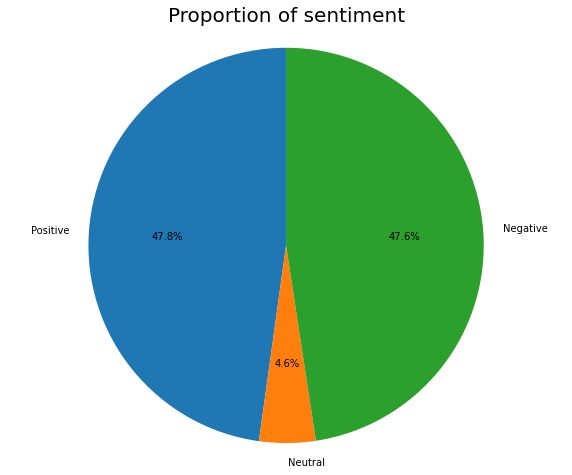

In [126]:
labels = "Positive", "Neutral", "Negative"
sizes = [df_tweets["sentiment"][df_tweets["sentiment"]=="positive"].count(), df_tweets["sentiment"][df_tweets["sentiment"]=="neutral"].count(), df_tweets["sentiment"][df_tweets["sentiment"]=="negative"].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of sentiment", size = 20)
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='favorite_count'>

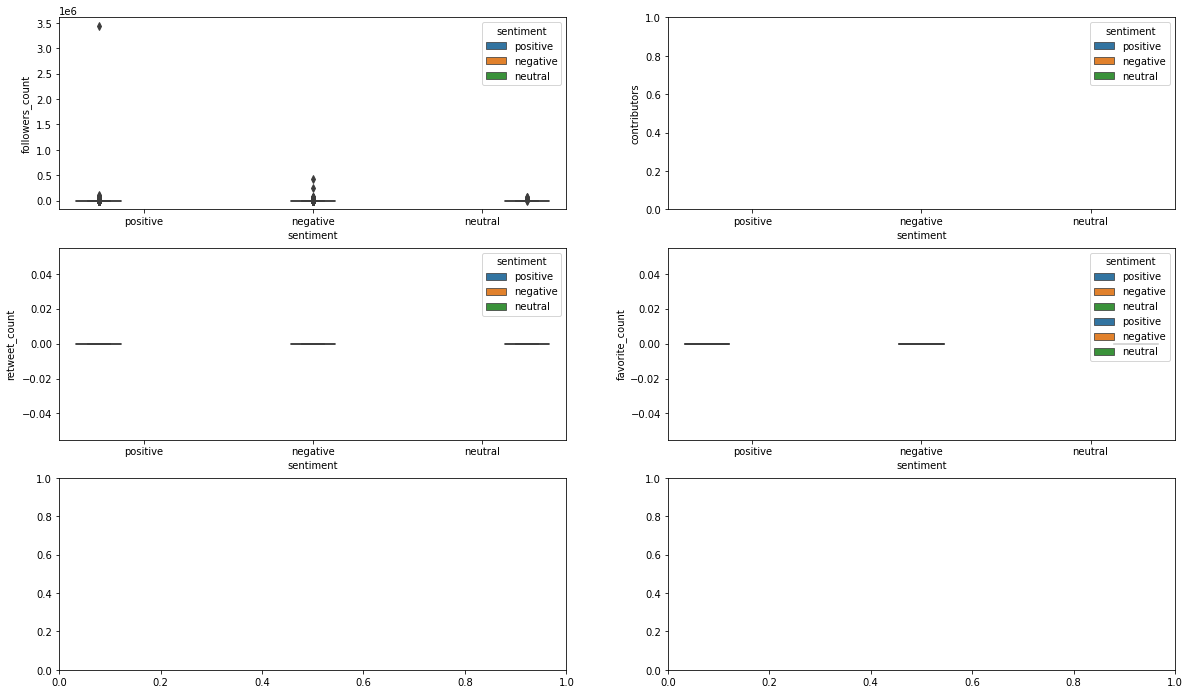

In [127]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='followers_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[0][0])
sns.boxplot(y='contributors',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[0][1])
sns.boxplot(y='retweet_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[1][0])
sns.boxplot(y='reply_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[1][1])
sns.boxplot(y='favorite_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[1][1])

<AxesSubplot:xlabel='possibly_sensitive', ylabel='count'>

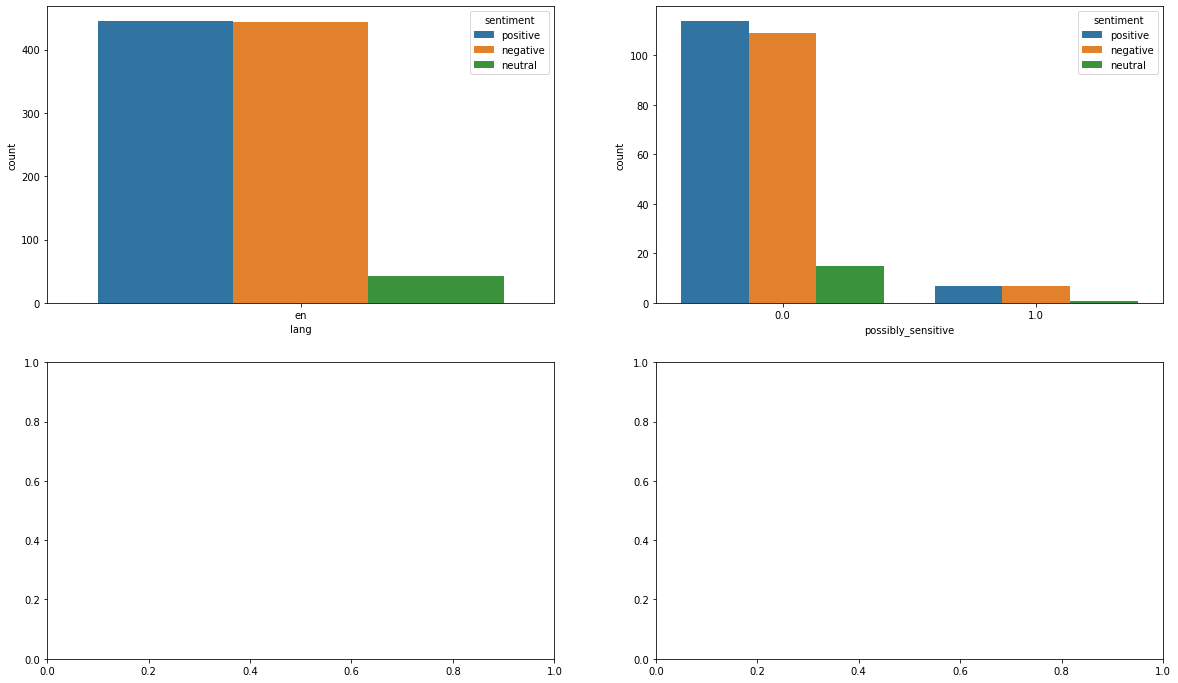

In [128]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='lang', hue = 'sentiment',data = df_tweets, ax=axarr[0][0])
sns.countplot(x='possibly_sensitive', hue = 'sentiment',data = df_tweets, ax=axarr[0][1])

In [129]:
for col in df_tweets.columns:
    print(col)

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms
display_text_range
extended_tweet
possibly_sensitive
quoted_status_id
quoted_status_id_str
quoted_status
quoted_status_permalink
extended_entities
neg_prob
pos_prob
sentiment
followers_count
